# ISLR Chapter 4 - End of Chapter Applied exercises code portion solutions¶

Exercises from: "An Introduction to Statistical Learning with Applications in R" (Springer, 2013) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

Data: http://faculty.marshall.usc.edu/gareth-james/ISL/data.html

Code Solutions by Arthur Avila

### 10. This question should be answered using the `Weekly` data set, which is part of the `ISLR` package. This data is similar in nature to the `Smarket` data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

#### (a) Produce some numerical and graphical summaries of the `Weekly` data. Do there appear to be any patterns?

In [1]:
require(ISLR)
require(RColorBrewer)
palette(brewer.pal(9, 'Set1'))

str(Weekly)
summary(Weekly)

Loading required package: ISLR
Loading required package: RColorBrewer


'data.frame':	1089 obs. of  9 variables:
 $ Year     : num  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ Lag1     : num  0.816 -0.27 -2.576 3.514 0.712 ...
 $ Lag2     : num  1.572 0.816 -0.27 -2.576 3.514 ...
 $ Lag3     : num  -3.936 1.572 0.816 -0.27 -2.576 ...
 $ Lag4     : num  -0.229 -3.936 1.572 0.816 -0.27 ...
 $ Lag5     : num  -3.484 -0.229 -3.936 1.572 0.816 ...
 $ Volume   : num  0.155 0.149 0.16 0.162 0.154 ...
 $ Today    : num  -0.27 -2.576 3.514 0.712 1.178 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 1 1 2 2 2 1 2 2 2 1 ...


      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

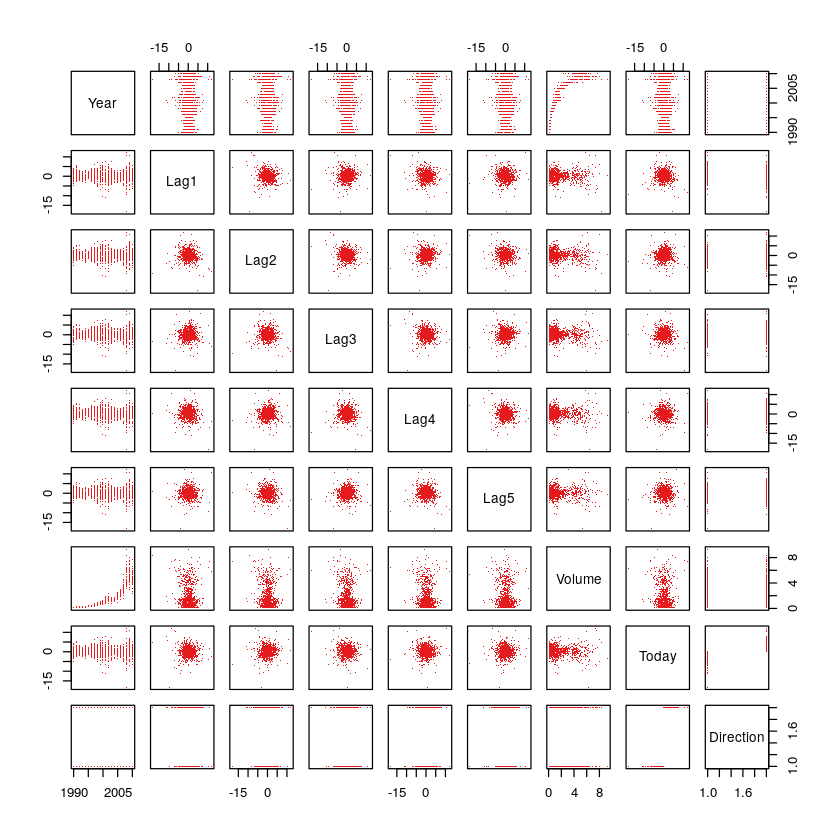

In [2]:
pairs(Weekly, pch='.', col=1)

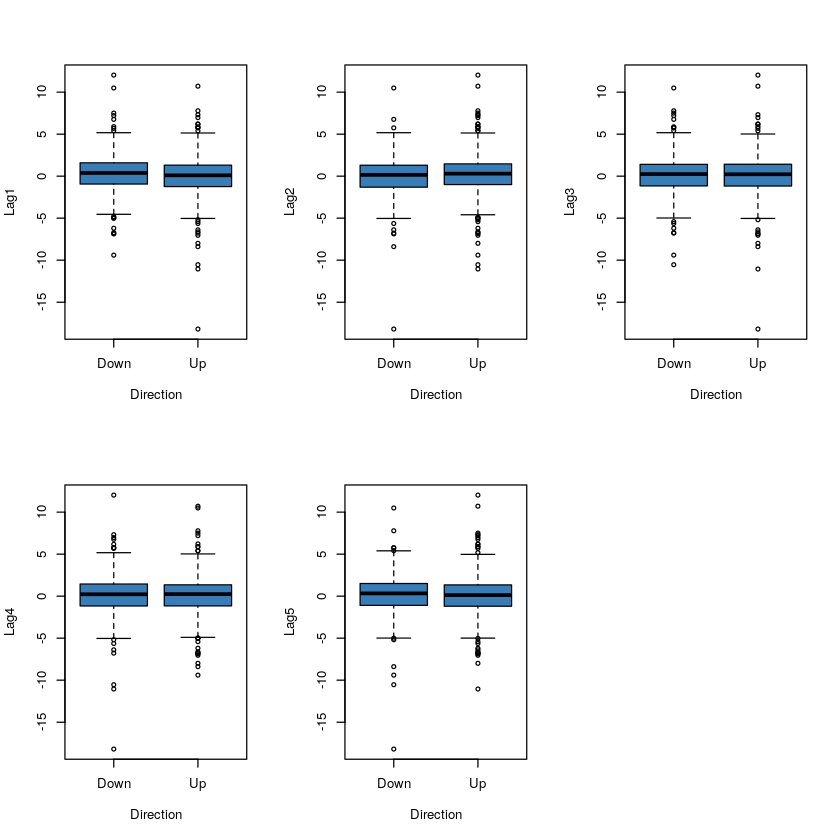

In [3]:
par(mfrow=c(2,3))
for (i in names(Weekly)[2:6]){
    plot(Weekly[,i]~Weekly[,'Direction'], xlab = 'Direction', ylab=i, col=2)
}

#### (b) Use the full data set to perform a logistic regression with `Direction` as the response and the five lag variables plus `Volume` as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [4]:
rhs = paste(names(Weekly)[2:7], collapse='+')
frml = as.formula(paste('Direction ~',rhs))
logit_fit = glm(frml, data=Weekly, family='binomial')
logit_summary = summary(logit_fit)
print(logit_summary)
print('Significant')
print(logit_summary$coef[,4]<0.05)


Call:
glm(formula = frml, family = "binomial", data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4

[1] "Significant"
(Intercept)        Lag1        Lag2        Lag3        Lag4        Lag5 
       TRUE 

#### (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [5]:
logit_pred = ifelse(fitted(logit_fit)>.5,'Up','Down')
(confusion <- table(logit_pred,Weekly$Direction))
cat(paste(  'Correct prediction rare:          ', sum(diag(confusion))/sum(confusion)))
cat(paste('\nCorrect prediction "Up" rate:     ', confusion['Up','Up']/sum(confusion['Up',])))
cat(paste('\nCorrect prediction of always "Up":', mean(Weekly$Direction=='Up')))

          
logit_pred Down  Up
      Down   54  48
      Up    430 557

Correct prediction rare:           0.561065197428834
Correct prediction "Up" rate:      0.564336372847011
Correct prediction of always "Up": 0.555555555555556

#### (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with `Lag2` as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [6]:
train <- Weekly$Year%in%1990:2008
Y <- Weekly$Direction[train]
Y_test <- Weekly$Direction[!train]
X <- Weekly$Lag2[train]
X_test <- Weekly$Lag2[!train]

logit_fit <- predict(glm(Y~X, family='binomial'),newdata=data.frame(X=X_test),type='response')
logit_pred <- ifelse(logit_fit>.5,'Up','Down')

reportf <- function(pred){
    print(confusion <- table(pred,Y_test))
    cat(paste(  'Correct prediction rare:          ', sum(diag(confusion))/sum(confusion)))
    cat(paste('\nCorrect prediction "Up" rate:     ', confusion['Up','Up']/sum(confusion['Up',])))
    cat(paste('\nCorrect prediction of always "Up":', mean(Y_test=='Up')))
}
reportf(logit_pred)

      Y_test
pred   Down Up
  Down    9  5
  Up     34 56
Correct prediction rare:           0.625
Correct prediction "Up" rate:      0.622222222222222
Correct prediction of always "Up": 0.586538461538462

#### (e) Repeat (d) using LDA.

In [7]:
require(MASS)
lda_pred <- predict(lda(Y~X),data.frame(Y = Y_test,X = X_test))
reportf(lda_pred$class)

Loading required package: MASS


      Y_test
pred   Down Up
  Down    9  5
  Up     34 56
Correct prediction rare:           0.625
Correct prediction "Up" rate:      0.622222222222222
Correct prediction of always "Up": 0.586538461538462

#### (f) Repeat (d) using QDA.

In [8]:
qda_pred <- predict(qda(Y~X),data.frame(Y = Y_test,X = X_test))
reportf(qda_pred$class)

      Y_test
pred   Down Up
  Down    0  0
  Up     43 61
Correct prediction rare:           0.586538461538462
Correct prediction "Up" rate:      0.586538461538462
Correct prediction of always "Up": 0.586538461538462

#### (g) Repeat (d) using KNN with K = 1.

In [9]:
require(class)
set.seed(66) # for random tie breaking
knn_pred=knn(as.matrix(X), as.matrix(X_test), Y, k=1)
reportf(knn_pred)

Loading required package: class


      Y_test
pred   Down Up
  Down   21 29
  Up     22 32
Correct prediction rare:           0.509615384615385
Correct prediction "Up" rate:      0.592592592592593
Correct prediction of always "Up": 0.586538461538462

#### (i) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for $K$ in the KNN classifier.

In [10]:
reportf<-function(rhs=2:7, p=.5){
    df = Weekly[rhs]
    print(names(Weekly)[rhs])
    print(frml <- paste0('Direction ~ (',paste(names(df), collapse=' + '),')^2'))
    frml = as.formula(frml)
    df$Direction = Weekly$Direction
    train <- Weekly$Year%in%1990:2008
    X_train <- as.matrix(Weekly[train,rhs])
    X_test <- as.matrix(Weekly[!train,rhs])
    if (length(rhs)>1) {
        inter = apply(combn(ncol(X_train),2),2,function(x) df[,x[1]]*df[,x[2]])
        X_train <- cbind(X_train, inter[train,])
        X_test  <- cbind(X_test, inter[!train,])
    }
    
    glm.m <- glm(frml, data=df, subset=train, family=binomial)
    glm.fit <- predict(glm.m, newdata = df[!train,], type='response')
    logit <- ifelse(glm.fit>p,'Up','Down')
    
    lda.m <- lda(frml, data=df, subset=train)
    lda <- predict(lda.m, df[!train,])$class
    
    qda.m <- qda(frml, data=df, subset=train)
    qda <- predict(qda.m, df[!train,])$class
    
    knn1 <- knn(X_train, X_test, df$Direction[train], k=1)
    knn3 <- knn(X_train, X_test, df$Direction[train], k=3)
    knn5 <- knn(X_train, X_test, df$Direction[train], k=5)
    
    pred <- data.frame(logit, lda, qda, knn1, knn3, knn5)
    
    out = apply(pred,2,function(x){
        confusion <- table(x,df$Direction[!train])
        correct<-sum(diag(confusion))/sum(confusion)
        correctUp<-confusion['Up','Up']/sum(confusion['Up',])
        return(c(correct.rate=correct,correctUp.rate=correctUp))
    })
    return(out)
}

reportf()
reportf(2:3)
reportf(3)
reportf(2:4)
reportf(3:7)
reportf(c(2:3,7))
reportf(4:7)
reportf(4:6)
                      


[1] "Lag1"   "Lag2"   "Lag3"   "Lag4"   "Lag5"   "Volume"
[1] "Direction ~ (Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume)^2"


,logit,lda,qda,knn1,knn3,knn5
correct.rate,0.5673077,0.5865385,0.4615385,0.4615385,0.4807692,0.5288462
correctUp.rate,0.6428571,0.6666667,0.5581395,0.5454545,0.5614035,0.6071429


[1] "Lag1" "Lag2"
[1] "Direction ~ (Lag1 + Lag2)^2"


,logit,lda,qda,knn1,knn3,knn5
correct.rate,0.5769231,0.5769231,0.4615385,0.5192308,0.4903846,0.6153846
correctUp.rate,0.5955056,0.5955056,0.5555556,0.5901639,0.5833333,0.6981132


[1] "Lag2"
[1] "Direction ~ (Lag2)^2"


,logit,lda,qda,knn1,knn3,knn5
correct.rate,0.6250000,0.6250000,0.4134615,0.5096154,0.5480769,0.5192308
correctUp.rate,0.6222222,0.6222222,0.5865385,0.5925926,0.6029412,0.5820896


[1] "Lag1" "Lag2" "Lag3"
[1] "Direction ~ (Lag1 + Lag2 + Lag3)^2"


,logit,lda,qda,knn1,knn3,knn5
correct.rate,0.5865385,0.5865385,0.5192308,0.5000000,0.5096154,0.5192308
correctUp.rate,0.6022727,0.6022727,0.6122449,0.5714286,0.5806452,0.5820896


[1] "Lag2"   "Lag3"   "Lag4"   "Lag5"   "Volume"
[1] "Direction ~ (Lag2 + Lag3 + Lag4 + Lag5 + Volume)^2"


,logit,lda,qda,knn1,knn3,knn5
correct.rate,0.5576923,0.5673077,0.4711538,0.5096154,0.5288462,0.5192308
correctUp.rate,0.5974026,0.6052632,0.5535714,0.5862069,0.5937500,0.5820896


[1] "Lag1"   "Lag2"   "Volume"
[1] "Direction ~ (Lag1 + Lag2 + Volume)^2"


,logit,lda,qda,knn1,knn3,knn5
correct.rate,0.5000000,0.4807692,0.3846154,0.5000000,0.5384615,0.5192308
correctUp.rate,0.6216216,0.6000000,0.4347826,0.5818182,0.6326531,0.5964912


[1] "Lag3"   "Lag4"   "Lag5"   "Volume"
[1] "Direction ~ (Lag3 + Lag4 + Lag5 + Volume)^2"


,logit,lda,qda,knn1,knn3,knn5
correct.rate,0.5865385,0.5769231,0.4038462,0.4711538,0.5096154,0.5288462
correctUp.rate,0.6323529,0.6231884,0.4761905,0.5750000,0.5892857,0.6071429


[1] "Lag3" "Lag4" "Lag5"
[1] "Direction ~ (Lag3 + Lag4 + Lag5)^2"


,logit,lda,qda,knn1,knn3,knn5
correct.rate,0.5576923,0.5576923,0.5480769,0.5673077,0.5769231,0.4807692
correctUp.rate,0.5789474,0.5789474,0.5921053,0.6333333,0.6491228,0.5636364


### 11. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

#### (a) Create a binary variable, `mpg01` , that contains a 1 if `mpg` contains a value above its median, and a 0 if `mpg` contains a value below its median. You can compute the median using the `median()` function. Note you may find it helpful to use the `data.frame()` function to create a single data set containing both `mpg01` and the other `Auto` variables.

In [11]:
df = read.table('Auto.data', header=T, na.strings='?')
df = df[!apply(df,1,anyNA),]

Auto = data.frame(mpg01 = df$mpg>median(df$mpg), df[2:8])
Auto$origin = as.factor(Auto$origin)
str(Auto)

'data.frame':	392 obs. of  8 variables:
 $ mpg01       : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...


#### (b) Explore the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

       
          1   2   3
  FALSE 173  14   9
  TRUE   72  54  70

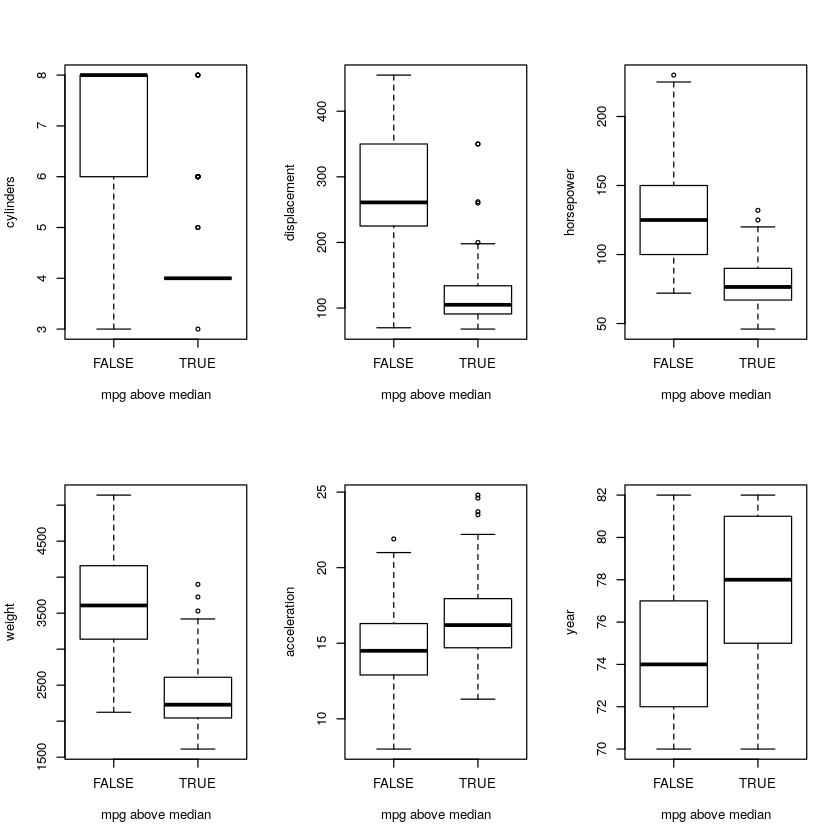

In [12]:
par(mfrow=c(2,3))

for (x in names(Auto)[2:7]){
    boxplot(Auto[,x]~Auto[,'mpg01'], ylab=x, xlab='mpg above median')
}
table(Auto$mpg01,Auto$origin)

#### (c) Split the data into a training set and a test set.

In [13]:
set.seed(999)
train = sort(sample(1:nrow(Auto), round(2*nrow(Auto)/3)))
test = c(1:392)[-train]
df.train <- Auto[train,]
df.test <- Auto[test,]
dim(df.train)
dim(df.test)

[1] 261   8

[1] 131   8

#### (d) Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [14]:
require(MASS)
lda.m<-lda(mpg01~.-acceleration, data=df.train)
lda.p<-predict(lda.m,df.test)$class
(confusion <- table(lda.p,df.test$mpg01))
error <- 1- sum(diag(confusion))/sum(confusion)
cat(paste0('The error rate is ',round(100*error,3),'%.'))

       
lda.p   FALSE TRUE
  FALSE    57    0
  TRUE      9   65

The error rate is 6.87%.

#### (e) Perform QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [15]:
require(MASS)
qda.m<-qda(mpg01~.-acceleration, data=df.train)
qda.p<-predict(qda.m,df.test)$class
(confusion <- table(qda.p,df.test$mpg01))
error <- 1- sum(diag(confusion))/sum(confusion)
cat(paste0('The error rate is ',round(100*error,3),'%.'))

       
qda.p   FALSE TRUE
  FALSE    58    2
  TRUE      8   63

The error rate is 7.634%.

#### (f) Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [16]:
glm.m<-glm(mpg01~.-acceleration, data=df.train, family=binomial)
summary(glm.m)
glm.p<-predict(glm.m,df.test,type='response')>.5
(confusion <- table(glm.p,df.test$mpg01))
error <- 1- sum(diag(confusion))/sum(confusion)
cat(paste0('The error rate is ',round(100*error,3),'%.'))


Call:
glm(formula = mpg01 ~ . - acceleration, family = binomial, data = df.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4906  -0.1087   0.0109   0.2348   2.7665  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -20.597318   5.984930  -3.442 0.000578 ***
cylinders     -0.100479   0.514840  -0.195 0.845264    
displacement   0.018738   0.015497   1.209 0.226604    
horsepower    -0.043238   0.021728  -1.990 0.046592 *  
weight        -0.005853   0.001489  -3.932 8.43e-05 ***
year           0.497105   0.099793   4.981 6.31e-07 ***
origin2        2.775292   0.935345   2.967 0.003006 ** 
origin3        1.598539   0.881477   1.813 0.069758 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 361.82  on 260  degrees of freedom
Residual deviance: 109.67  on 253  degrees of freedom
AIC: 125.67

Number of Fisher Scoring iterations: 

       
glm.p   FALSE TRUE
  FALSE    59    3
  TRUE      7   62

The error rate is 7.634%.

#### (g) Perform KNN on the training data, with several values of $K$, in order to predict `mpg01`. Use only the variables that seemed most associated with `mpg01` in (b). What test errors do you obtain? Which value of `K` seems to perform the best on this data set?

In [17]:
require(class)
X = as.matrix(Auto[,-1])
X = apply(X,2,as.numeric)
X = apply(X,2,scale)
X.train = X[train,]
X.test = X[test,]

Y.train = as.matrix(df.train[,1])
Y.test = as.matrix(df.test[,1])
set.seed(123)
for (k in 1:9){
    knn.p <- knn(X.train,X.test,Y.train,k=k)
    print(confusion <- table(knn.p,df.test$mpg01))
    error <- 1- sum(diag(confusion))/sum(confusion)
    cat(paste0('The error rate for k = ',k, ' is ',round(100*error,3),'%.\n'))
}

       
knn.p   FALSE TRUE
  FALSE    62    3
  TRUE      4   62
The error rate for k = 1 is 5.344%.
       
knn.p   FALSE TRUE
  FALSE    59    4
  TRUE      7   61
The error rate for k = 2 is 8.397%.
       
knn.p   FALSE TRUE
  FALSE    62    4
  TRUE      4   61
The error rate for k = 3 is 6.107%.
       
knn.p   FALSE TRUE
  FALSE    60    3
  TRUE      6   62
The error rate for k = 4 is 6.87%.
       
knn.p   FALSE TRUE
  FALSE    61    1
  TRUE      5   64
The error rate for k = 5 is 4.58%.
       
knn.p   FALSE TRUE
  FALSE    60    2
  TRUE      6   63
The error rate for k = 6 is 6.107%.
       
knn.p   FALSE TRUE
  FALSE    59    1
  TRUE      7   64
The error rate for k = 7 is 6.107%.
       
knn.p   FALSE TRUE
  FALSE    59    1
  TRUE      7   64
The error rate for k = 8 is 6.107%.
       
knn.p   FALSE TRUE
  FALSE    59    1
  TRUE      7   64
The error rate for k = 9 is 6.107%.


### 12. This problem involves writing functions.

#### (a) Write a function, `Power() `, that prints out the result of raising 2 to the 3rd power. In other words, your function should compute $2^3$ and print out the results.

*Hint: Recall that $x^a$ raises $x$ to the power $a$. Use the `print()` function to output the result.*

In [18]:
Power <- function(){
    print(2^3)
}
Power()

[1] 8


#### (b) Create a new function, `Power2() `, that allows you to pass any two numbers, `x` and `a` , and prints out the value of `x^a`. You can do this by beginning your function with the line
```
> Power2 = function (x , a ) {
```
#### You should be able to call your function by entering, for instance,
```
> Power2 (3 ,8)
```
#### on the command line. This should output the value of $3^8$, namely, 6,561.

In [19]:
Power2 = function(x,a){
    print(x^a)
}
Power2(3,8)

[1] 6561


#### (c) Using the `Power2()` function that you just wrote, compute $10^3$, $8^{17}$, and $131^3$.

In [20]:
Power2(10,3)
Power2(8,17)
Power2(131,3)

[1] 1000
[1] 2.2518e+15
[1] 2248091


#### (d) Now create a new function, `Power3()` , that actually returns the result `x^a` as an `R` object, rather than simply printing it to the screen. That is, if you store the value `x^a` in an object called result within your function, then you can simply `return()` this result, using the following line:
```
return(result)
```
#### The line above should be the last line in your function, before the `}` symbol.

In [21]:
Power3 = function(x,a){
    return(x^a)
}

#### (e) Now using the `Power3()` function, create a plot of $f(x) = x^2$. The $x$-axis should display a range of integers from 1 to 10, and the $y$-axis should display $x^2$. Label the axes appropriately, and use an appropriate title for the figure. Consider displaying either the $x$-axis, the $y$-axis, or both on the log-scale. You can do this by using `log="x"`, `log="y"`, or `log="xy"` as arguments to the `plot()` function.

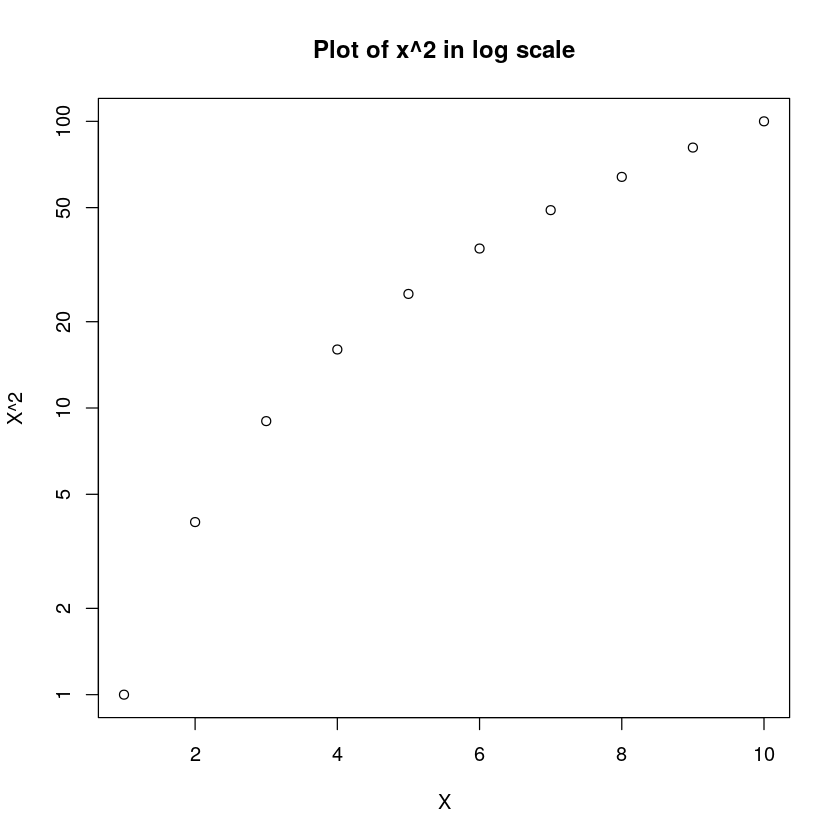

In [22]:
plot(1:10,Power3(1:10,2), xlab='X', ylab='X^2', log='y', main='Plot of x^2 in log scale')

#### (f) Create a function, `PlotPower()`, that allows you to create a plot of `x` against `x^a` for `a` fixed a and for a range of values of `x`. For instance, if you call
```
> PlotPower (1:10 ,3)
```
#### then a plot should be created with an $x$-axis taking on values $1, 2, \dots , 10$, and a $y$-axis taking on values $1^3, 2^3, \dots, 10^3$.

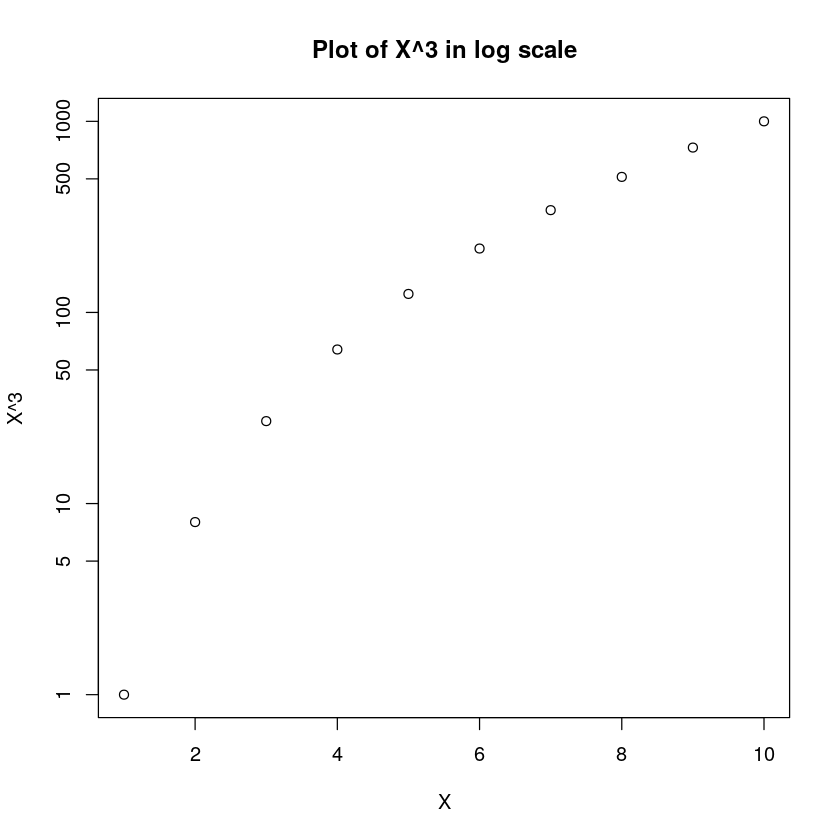

In [23]:
PlotPower<-function(x,a){
    plot(x, x^a, xlab='X', ylab=paste0('X^',a), log='y',
        main=paste0('Plot of X^',a,' in log scale'))
}
PlotPower(1:10,3)

### 13. Using the `Boston` data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, and KNN models using various subsets of the predictors. Describe your findings.

       
                 0          1
  FALSE 0.94861660 0.05138340
  TRUE  0.91304348 0.08695652


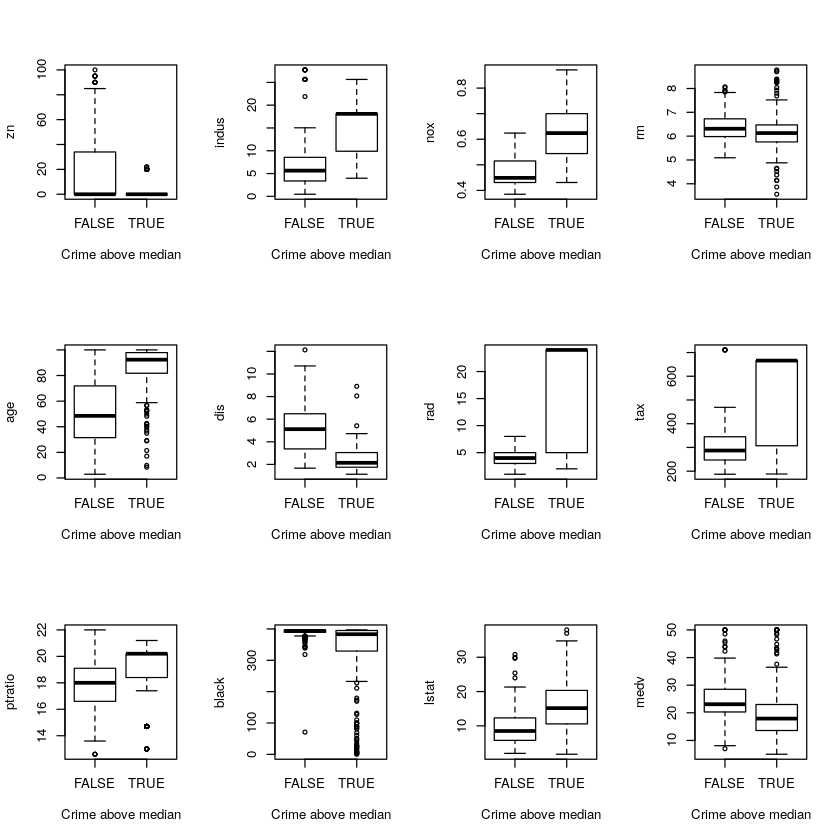

In [24]:
require(MASS)
boston = Boston
boston$crim <- boston$crim>median(boston$crim)
print((conf<-table(boston$crim,boston$chas))/rowSums(conf))
par(mfrow=c(3,4))
for (x in c(2:3,5:14)){
    boxplot(boston[,x]~boston[,1], xlab='Crime above median', ylab = names(boston)[x])
}

In [25]:
(abs(cor(boston))>0.7)*cor(boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.0000000,0,0.0000000,0,0.7232348,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0.0000000,0.0000000
zn,0.0000000,1,0.0000000,0,0.0000000,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0.0000000,0.0000000
indus,0.0000000,0,1.0000000,0,0.7636514,0,0.0000000,-0.7080270,0.0000000,0.7207602,0,0,0.0000000,0.0000000
chas,0.0000000,0,0.0000000,1,0.0000000,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0.0000000,0.0000000
nox,0.7232348,0,0.7636514,0,1.0000000,0,0.7314701,-0.7692301,0.0000000,0.0000000,0,0,0.0000000,0.0000000
rm,0.0000000,0,0.0000000,0,0.0000000,1,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0.0000000,0.0000000
age,0.0000000,0,0.0000000,0,0.7314701,0,1.0000000,-0.7478805,0.0000000,0.0000000,0,0,0.0000000,0.0000000
dis,0.0000000,0,-0.7080270,0,-0.7692301,0,-0.7478805,1.0000000,0.0000000,0.0000000,0,0,0.0000000,0.0000000
rad,0.0000000,0,0.0000000,0,0.0000000,0,0.0000000,0.0000000,1.0000000,0.9102282,0,0,0.0000000,0.0000000
tax,0.0000000,0,0.7207602,0,0.0000000,0,0.0000000,0.0000000,0.9102282,1.0000000,0,0,0.0000000,0.0000000


In [26]:
set.seed(999)
train = sort(sample(1:nrow(boston), round(.75*nrow(boston))))
test = c(1:nrow(boston))[-train]

rhs = paste0(names(boston)[-c(1)], collapse = ' + ')
frml = as.formula(paste0('crim ~ (',rhs,')^2'))

options(warn=-1)
lginter<-step(glm(frml, data=boston, family=binomial, subset=train), trace=0)
summary(lginter)
frml = as.formula(paste0('crim ~ (',rhs,')'))
lgsimple<-step(glm(frml, data=boston, family=binomial, subset=train), trace=0)
summary(lgsimple)
options(warn=0)


Call:
glm(formula = crim ~ zn + indus + chas + nox + rm + age + dis + 
    rad + tax + ptratio + lstat + medv + indus:chas + indus:age + 
    indus:rad + indus:medv + chas:tax + nox:rm + nox:rad + nox:tax + 
    rm:ptratio + age:dis + age:ptratio + dis:tax + dis:ptratio + 
    rad:tax + rad:ptratio + tax:medv + ptratio:lstat + ptratio:medv + 
    lstat:medv, family = binomial, data = boston, subset = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.03762   0.00000   0.00000   0.00000   0.03915  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)
(Intercept)    179232.93  224900.91   0.797    0.425
zn              -1195.13    1548.66  -0.772    0.440
indus             991.78    1297.44   0.764    0.445
chas           -12613.57   99463.46  -0.127    0.899
nox           -304205.10  388180.22  -0.784    0.433
rm              91509.98  120173.48   0.761    0.446
age             -3189.86    4147.69  -0.769    0.442
dis           -123517.43 


Call:
glm(formula = crim ~ zn + indus + chas + nox + dis + rad + tax + 
    ptratio + black + medv, family = binomial, data = boston, 
    subset = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.46929  -0.11833  -0.00009   0.00119   2.41615  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -42.543394   8.153658  -5.218 1.81e-07 ***
zn           -0.132617   0.053284  -2.489 0.012815 *  
indus        -0.083236   0.059322  -1.403 0.160581    
chas          2.930339   1.098894   2.667 0.007662 ** 
nox          65.209409  11.010368   5.923 3.17e-09 ***
dis           0.870347   0.281683   3.090 0.002003 ** 
rad           0.692115   0.204085   3.391 0.000696 ***
tax          -0.007023   0.003821  -1.838 0.066062 .  
ptratio       0.308805   0.136576   2.261 0.023756 *  
black        -0.010895   0.005704  -1.910 0.056129 .  
medv          0.117567   0.042240   2.783 0.005381 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘

In [27]:
print('Chosen variables')
labels(terms(lgsimple))
print('High collinearity, but that is handled in a later chapter')

[1] "Chosen variables"


[1] "zn"      "indus"   "chas"    "nox"     "dis"     "rad"     "tax"    
 [8] "ptratio" "black"   "medv"

[1] "High collinearity, but that is handled in a later chapter"


In [28]:
require(class)
frml <- formula(lgsimple)
p <- 0.5
glm.m <- glm(frml, data=boston, subset=train, family=binomial)
glm.fit <- predict(glm.m, newdata = boston[test,], type='response')
logit <- ifelse(glm.fit > p, 'Up', 'Down')

lda.m <- lda(frml, data=boston, subset=train)
lda <- predict(lda.m, boston[test,])$class
    
qda.m <- qda(frml, data=boston, subset=train)
qda <- predict(qda.m, boston[test,])$class

X <- apply(boston[train,labels(terms(lgsimple))],2,scale)
dim(X)
Y <- as.matrix(boston[train,'crim'])
X.test <- apply(boston[test,labels(terms(lgsimple))],2,scale)
Y.test <- as.matrix(boston[test,'crim'])

knn1 <- knn(X, X.test, Y, k=1)
knn3 <- knn(X, X.test, Y, k=3)
knn5 <- knn(X, X.test, Y, k=5)

pred <- data.frame(logit, lda, qda, knn1, knn3, knn5)

apply(pred,2,function(x){
        confusion <- table(x,Y.test)
        correct<-100*sum(diag(confusion))/sum(confusion)
        return(round(correct,3))
    })

[1] 380  10

logit    lda    qda   knn1   knn3   knn5 
87.302 79.365 86.508 88.889 88.095 85.714